# 2. Assignment

## Portfolio Management
### MLP Training

#### January 2025

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu

$$\newcommand{\spy}{\text{spy}}$$
$$\newcommand{\hyg}{\text{hyg}}$$

# Data
* Use the file, `data/assignment_2_data.xlsx`.

The data file contains...
* Return rates, $r_t^i$, for various asset classes, (via ETFs.)
* Most notable among these securities is SPY, the return on the S&P 500. Denote this as $r^{\spy}_t$.
* A separate tab gives return rates for a particular portfolio, $r_t^p$.

***

In [88]:
import sys
sys.path.insert(0, '../cmds')
from portfolio import performanceMetrics, get_ols_metrics
from risk import *
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

path = '../data/assignment_2_data.xlsx'
port_ret_df = pd.read_excel(path, 'portfolio returns').set_index('Date') 
tot_ret_df = pd.read_excel(path, 'total returns').set_index('Date')
SCALE = 12


# 1. Regression
## 1. 
Estimate the regression of the portfolio return on SPY:

$$r^p_t = \alpha + \beta r^{\spy}_t + \epsilon_t^{p,\spy}$$

Specifically, report your estimates of alpha, beta, and the r-squared.


In [89]:
spy = tot_ret_df['SPY']
display(spy.head())

Date
2015-02-28    0.056204
2015-03-31   -0.015706
2015-04-30    0.009834
2015-05-31    0.012856
2015-06-30   -0.020312
Name: SPY, dtype: float64

In [90]:
import pandas as pd

X = spy * SCALE # annualize monthly returns
X = sm.add_constant(X) # how dependent is our portfolio return on SPY?
y = port_ret_df * SCALE

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     414.7
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.86e-40
Time:                        13:26:32   Log-Likelihood:                 33.993
No. Observations:                 119   AIC:                            -63.99
Df Residuals:                     117   BIC:                            -58.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0405      0.017     -2.332      0.0


## 2. 
Estimate the regression of the portfolio return on SPY and on HYG, the return on high-yield
corporate bonds, denoted as $r^{\hyg}_t$:

$$r^p_t = {\alpha} + {\beta}^{\spy}r^{\spy}_t + {\beta}^{\hyg}r^{\hyg}_t + {\epsilon}_t$$

Specifically, report your estimates of alpha, the betas, and the r-squared.

*Note that the parameters (such as $\beta^{\spy}$) in this multivariate model are not the same as used in the univariate model of part 1. 


In [91]:
import pandas as pd

X = tot_ret_df[['SPY', 'HYG']] # annualize monthly returns
X = sm.add_constant(X) # how dependent is our portfolio return on SPY?
y = port_ret_df

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     274.1
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.10e-44
Time:                        13:26:32   Log-Likelihood:                 343.45
No. Observations:                 119   AIC:                            -680.9
Df Residuals:                     116   BIC:                            -672.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.001     -2.051      0.0


## 3. 
Calculate the series of fitted regression values, sometimes referred to as $\hat{y}$ in standard textbooks:

$$\hat{r}^p_t = \hat{\alpha} + \hat{\beta}^{\spy}r^{\spy}_t + \hat{\beta}^{\hyg}r^{\hyg}_t$$

Your statistical package will output these fitted values for you, or you can construct them using the estimated parameters.

What is the correlation of $\hat{r}^p_t$ with $r^p_t$?

How does this compare to the r-squared of the regression in problem 2?


In [92]:
import pandas as pd

r_hat = -0.0320 + 0.4241 * tot_ret_df['SPY'] + 0.5404 * tot_ret_df['HYG']
display(f"Correlation between r_hat and real return: {r_hat.corr(port_ret_df['portfolio'])}")

'Correlation between r_hat and real return: 0.9084978347879246'

This correlation is higher than the R-squared (0.825) from the first regression.


## 4. 
How do the SPY betas differ across the univariate and multivariate models? How does this relate to the
correlation between $r^{\spy}$ and $r^{\hyg}$?

In [93]:
display(f"Correlation between r_hat and real return: {tot_ret_df['HYG'].corr(tot_ret_df['SPY'])}")

'Correlation between r_hat and real return: 0.8193630761581114'

The beta to SPY is lower in multivariate (0.42) than univariate (0.6474). We simply have more factors to help explain our portfolio returns so it makes sense that the amount SPY can help us explain our portfolio returns would be diminished. We added HYG as a factor to see if our returns can be explained by a combination of SPY and HYG. But it is important to note that if HYG and SPY were perfectly correlated, we wouldn't get anything unique from adding HYG, but since they are not perfectly correlated we can use it as a factor of our portfolio return

***

# 2. Decomposing and Replicating

## 1.
The portfolio return, $r_t^p$, is a combination of the base assets that are provided here. Use linear regression to uncover which weights were used in constructing the portfolio.

$$r_t^p = \alpha +\left(\boldsymbol{\beta}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the individual securities.
* What does the regression find were the original weights?
* How precise is the estimation? Consider the R-squared and t-stats.

*Feel free to include an $\alpha$ in this model, even though you know the portfolio is an exact function of the individual securities. The estimation should find $\alpha$ of (nearly) zero.*


In [94]:
import pandas as pd

X = tot_ret_df * SCALE
X = sm.add_constant(X) # how dependent is our portfolio return on SPY?
y = port_ret_df * SCALE

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.960e+31
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        13:26:35   Log-Likelihood:                 4156.7
No. Observations:                 119   AIC:                            -8287.
Df Residuals:                     106   BIC:                            -8251.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.041e-16   2.31e-17     -4.511      0.0

Our portfolio contains IEF, IYR, PSP, and QAI in equal weights. If we look at R-squared, we have 1.0. This means that 100% of the variance of our portfolio can be explained by the independent variables (our basket of securities). This means we can assert our finding of equal weights since there also is no alpha generated when we regress (alpha would signify some portion of return is unexplainable from these securities). We also see that for the alpha (const), IEF, IYR, PSP, QAI the t stats are greater than 2.



## 2.

$$\newcommand{\targ}{EEM}$$

Suppose that we want to mimic a return, **EEM** using the other returns. Run the following regression–but
do so **only using data through the end of `2022`.**

$$r_t^{\targ} = \alpha +\left(\boldsymbol{\beta}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the other securities, excluding the target, **EEM**.

#### (a) 
Report the r-squared and the estimate of the vector, $\boldsymbol{\beta}$.

#### (b) 
Report the t-stats of the explanatory returns. Which have absolute value greater than 2?

#### (c) 
Plot the returns of **EEM** along with the replication values.


In [112]:
limit_tot_ret = tot_ret_df[tot_ret_df.index < '2023-01-01']

limit_tot_ret_ex_eem = limit_tot_ret.drop('EEM', axis=1)
limit_eem_ret = limit_tot_ret['EEM']

X = limit_tot_ret_ex_eem * SCALE
X = sm.add_constant(X)
y = limit_eem_ret * SCALE

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    EEM   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     28.25
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.50e-23
Time:                        13:31:23   Log-Likelihood:                -14.464
No. Observations:                  95   AIC:                             52.93
Df Residuals:                      83   BIC:                             83.57
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0541      0.044      1.231      0.2

# Beta

In [104]:
model.params

const    0.054057
BWX      0.801586
DBC     -0.000315
EFA      0.523534
HYG     -0.202099
IEF     -0.820256
IYR     -0.013035
PSP     -0.147023
QAI      1.991248
SHV     -2.121130
SPY     -0.201199
TIP      0.202185
dtype: float64

# R-squared: 0.789

# T stats
The T stats with absolute value > 2 are the coefficients for BWX, EFA, IEF, and QAI

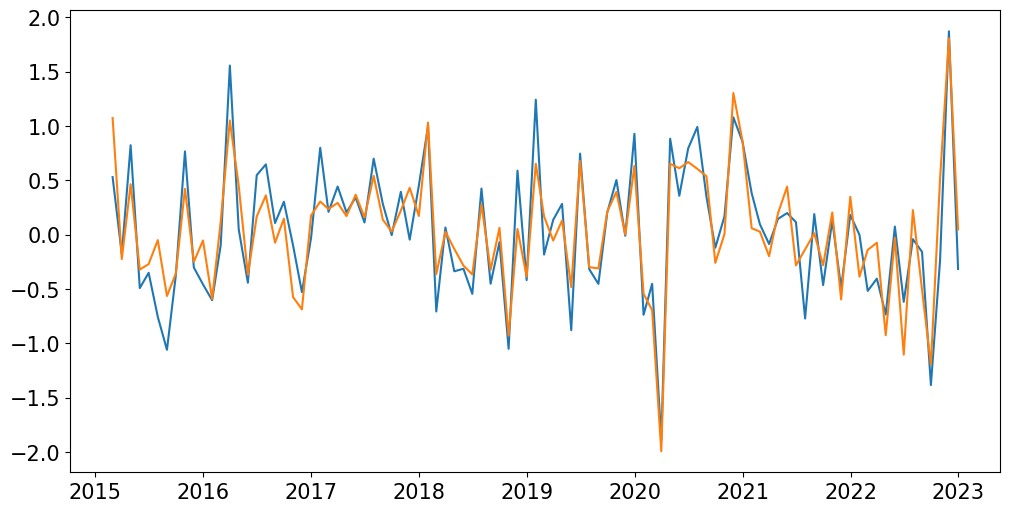

In [113]:
import matplotlib.pyplot as plt

coeff = model.params
eem_predict = X.dot(coeff)

plt.plot(limit_eem_ret * SCALE)
plt.plot(eem_predict)



## 3.
Perhaps the replication results in the previous problem are overstated given that they estimated the parameters within a sample and then evaluated how well the result fit in the same sample. This is known as in-sample fit.

Using the estimates through `2022`, (the α and βˆ from the previous problem,) calculate the out-of-sample (OOS) values of the replication, using the `2023-2024` returns, denoted $\boldsymbol{r}_t^{\text{oos}}$:

$$\hat{r}_t^{\targ} = \left(\widehat{\boldsymbol{\beta}}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t^{\text{oos}}$$

#### (a) 
What is the correlation between $\hat{r}_t^{\targ}$ and $\boldsymbol{r}_t^{\text{oos}}$?

#### (b) 
How does this compare to the r-squared from the regression above based on in-sample data, (through `2022`?)

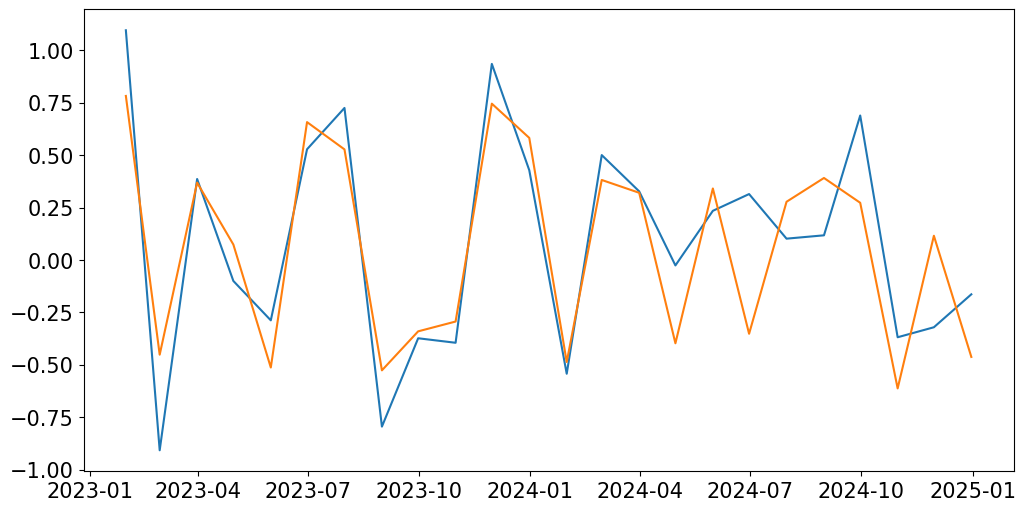

In [119]:
coeff = model.params
oos_tot_ret = tot_ret_df[tot_ret_df.index >= '2023-01-01']
oos_tot_ret_ex_eem = oos_tot_ret.drop('EEM', axis=1)

oos_actual_eem = oos_tot_ret['EEM']
X = oos_tot_ret_ex_eem * SCALE
X = sm.add_constant(X)
oos_eem_predict = X.dot(coeff)

plt.clf()
plt.plot(oos_actual_eem * SCALE)
plt.plot(oos_eem_predict)

In [121]:
oos_eem_predict.corr(oos_actual_eem)

np.float64(0.8500157998912383)

The R correlation between the out of sample predicted EEM and true out of sample data is really high (0.85), it is even higher than our R-squared from the in sample data of 0.789

***